In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [349]:
#import the csv file into pandas dataframe
data=pd.read_csv('avocado.csv',parse_dates=['Date'])
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [350]:
#Checking for null values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [351]:
#Now lets check the datatypes for each column
data.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [352]:
data.shape

(1517, 14)

In [353]:
data['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [354]:
#Dropping the column type since it has only one unique value and hence has no impact on
data.drop(['type'],axis=1,inplace=True)

In [355]:
data['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [356]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [357]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


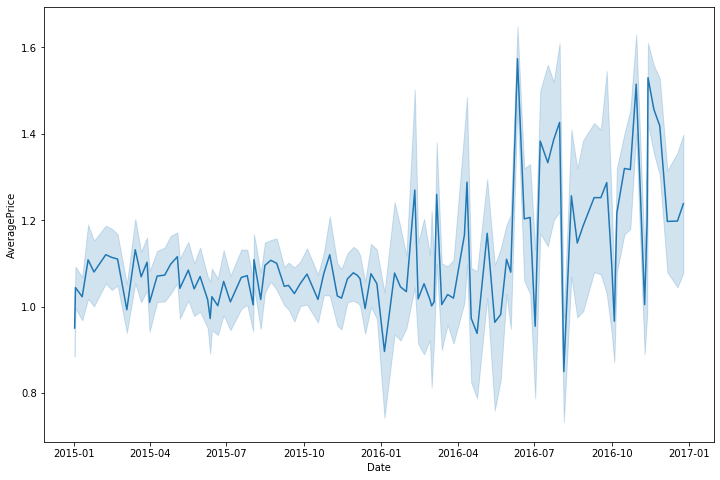

In [358]:
#Graphical Representation
plt.figure(figsize=(12,8))
sns.lineplot(x='Date',y='AveragePrice',data=data)

In [359]:
#Splitting the date into Month and Day
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data.drop(['Date'],axis=1,inplace=True)

In [360]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29


In [361]:
#data.drop(['region'],axis=1,inplace=True)
data.drop(['year'],axis=1,inplace=True)

In [362]:
#Changing the region for processing by the machine
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['region']=le.fit_transform(data['region'])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,11,29


In [363]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,21.196440,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,16.132398,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,6.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,19.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,35.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000,12.000000,31.000000


In [364]:
collist=data.columns.values
ncol=20
nrow=5

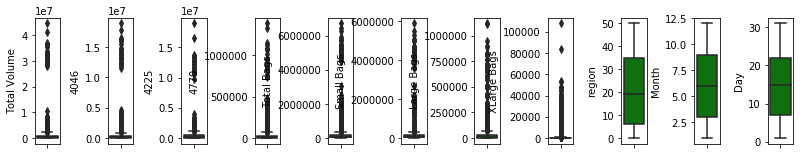

In [365]:
plt.figure(figsize=(ncol,10))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [366]:
from scipy.stats import zscore
z_sc=np.abs(zscore(data))
data=data.loc[(z_sc<3).all(axis=1)]

In [367]:
data.shape

(1436, 12)

In [368]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day
AveragePrice,1.000000,-0.271504,-0.380282,-0.120872,-0.110292,-0.157514,-0.135342,-0.229402,-0.069536,-0.212618,0.066069,0.091823
Total Volume,-0.271504,1.000000,0.914238,0.916256,0.708447,0.875613,0.859114,0.750335,0.329997,0.159801,-0.047144,-0.018285
4046,-0.380282,0.914238,1.000000,0.696312,0.545078,0.665928,0.642025,0.630837,0.183037,0.227472,-0.033249,-0.013321
4225,-0.120872,0.916256,0.696312,1.000000,0.678638,0.853477,0.844277,0.698375,0.303602,0.088169,-0.045320,-0.030386
4770,-0.110292,0.708447,0.545078,0.678638,1.000000,0.730976,0.741428,0.484775,0.645120,-0.068400,-0.025753,0.011683
Total Bags,-0.157514,0.875613,0.665928,0.853477,0.730976,1.000000,0.992654,0.791824,0.516496,0.076941,-0.064859,-0.003097
Small Bags,-0.135342,0.859114,0.642025,0.844277,0.741428,0.992654,1.000000,0.712355,0.533439,0.045297,-0.067076,0.002811
Large Bags,-0.229402,0.750335,0.630837,0.698375,0.484775,0.791824,0.712355,1.000000,0.263228,0.227399,-0.038740,-0.032891
XLarge Bags,-0.069536,0.329997,0.183037,0.303602,0.645120,0.516496,0.533439,0.263228,1.000000,-0.175977,-0.021421,0.020868
region,-0.212618,0.159801,0.227472,0.088169,-0.068400,0.076941,0.045297,0.227399,-0.175977,1.000000,0.006980,-0.026463


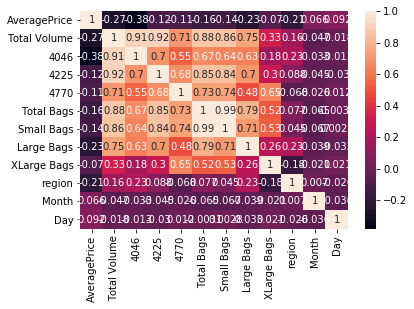

In [369]:
sns.heatmap(data.corr(),annot=True)

In [370]:
data.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
region          0.276276
Month           0.111898
Day             0.041849
dtype: float64

In [371]:
skewed=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in skewed:
    data[i]=np.log1p(data[i])
    

In [372]:
data.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
region          0.276276
Month           0.111898
Day             0.041849
dtype: float64

In [373]:
#from scipy.stats import boxcox
#data['year']=boxcox(data['year'],0)

In [374]:
data.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
region          0.276276
Month           0.111898
Day             0.041849
dtype: float64

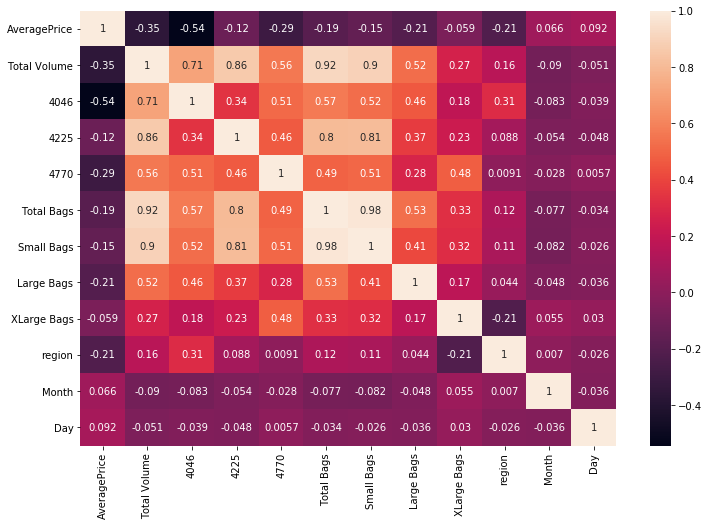

In [375]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [376]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7,10,16
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7,9,10
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7,2,10
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7,9,25


Designing a Machine Learning model to predict the average price / unit

In [377]:
x=data.iloc[:,1:]
y=data.iloc[:,0:1]
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
1512,1.39
1513,1.51
1514,1.48
1515,1.47


In [378]:
x.shape

(1436, 11)

In [379]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 57 is 0.4656937940235273


57

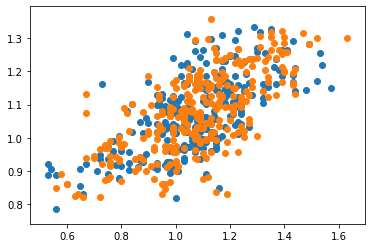

In [381]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref(lr,x,y)

Maximum r2 score corresponding to random state 42 is 0.763689734893421


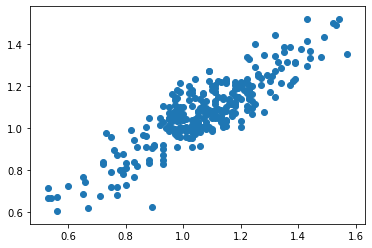

In [382]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
r_state=r2scoref(knr,x,y)

Maximum r2 score corresponding to random state 57 is 0.46263952280396703


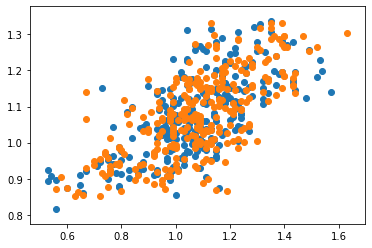

In [383]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.001)
r_state=r2scoref(lso,x,y)

In [384]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for KNR regression is:',cross_val_score(knr,x,y,cv=10,scoring="r2").mean())
print('Standard Deviation for KNR regression is :',cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2_score for KNR regression is: -0.44715170951062877
Standard Deviation for KNR regression is : 0.5923789927772926


In [385]:
from sklearn.externals import joblib
joblib.dump(knr,'Avocado_Price_Prediction.pkl')

['Avocado_Price_Prediction.pkl']